In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\Users\user\Downloads\matches.csv')

In [51]:
data.head(3) #Selecting top three rows from the dataframe

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,winners
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Sunrisers Hyderabad
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,Rising Pune Supergiant
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,Kolkata Knight Riders


In [7]:
data.shape #Fetching no of rows and columns

(756, 18)

In [8]:
data['winner'].sort_values().value_counts() #Checking the no of matches won by each team

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [10]:
#One with the name as "Rising Pune Supergiant" and other as "Rising Pune Supergiants". Let's cleanse 
#the data by modifying the "Rising Pune Supergiants" to "Rising Pune Supergiant". 
#Also, it can be present in other columns as well like 'team1', 'team2' , 'toss_winner'. Lets replace in all the columns at once. 
#we will use the apply() function to do so.

data.loc[data['winner'] == 'Rising Pune Supergiants', 'winner'] = 'Rising Pune Supergiant'
#But we have to replace in other series as well like 'team1', 'team2',etc.
data[['team1','team2','toss_winner','winner']] = data[['team1','team2','toss_winner','winner']].apply(lambda val : val.str.replace('Rising Pune Supergiants','Rising Pune Supergiant') )

In [24]:
winner_data=data['winner'].sort_values().value_counts()
winner_data

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

<AxesSubplot:title={'center':'Number of matches won in IPL'}>

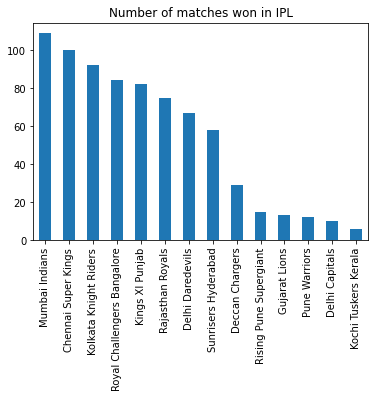

In [25]:
winner_data.plot(kind = 'bar', title = 'Number of matches won in IPL', label = 'Number of wins' )

In [26]:
# case where team won the toss and also won the match
winning_toss_winning_match = data[(data['toss_winner'] == data['winner'])]

In [27]:
# cases where team won the toss but lost the match
winning_toss_losing_match = data[(data['toss_winner'] != data['winner'])]

In [29]:
new_data= pd.DataFrame({"Team won the toss":[winning_toss_winning_match.shape[0],winning_toss_losing_match.shape[0]]}, index =['Won match', 'Lost match'])
new_data

,Team won the toss
Won match,393
Lost match,363


<AxesSubplot:title={'center':'Result dependance on toss'}>

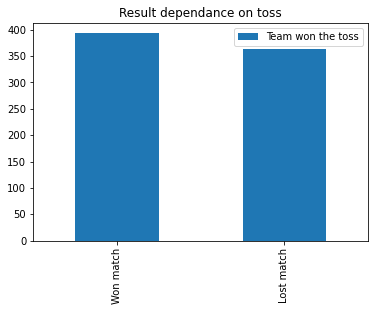

In [33]:
new_data.plot(kind = 'bar', legend='false', title = 'Result dependance on toss')

In [41]:
#correlation of winning the toss and batting first and winning and also fielding first and winning


team_batting_first_won = data.loc[(data['toss_winner'] == data['winner']) & (data['toss_decision'] == 'bat'), ['id', 'winner']]
team_fielding_first_won = data.loc[(data['toss_winner'] == data['winner']) & (data['toss_decision'] == 'field'),  ['id', 'winner']]


In [42]:
team_fielding_first_won_data= team_fielding_first_won['winner'].value_counts()
team_batting_first_won_data = team_batting_first_won['winner'].value_counts()

<AxesSubplot:title={'center':'Team winning toss, batting first and winning the match.'}>

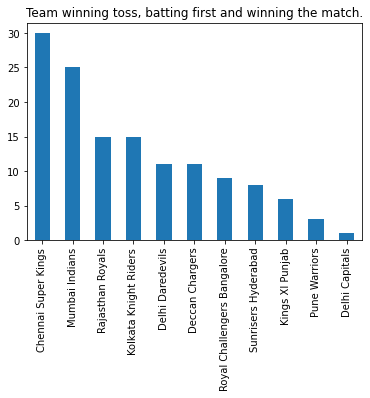

In [43]:
team_batting_first_won_data.plot(kind = 'bar', title = 'Team winning toss, batting first and winning the match.')

<AxesSubplot:title={'center':'Team winning toss, fielding first and winning the match.'}>

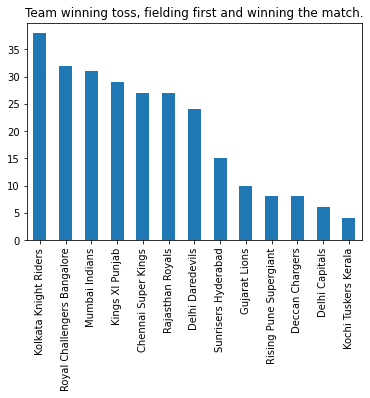

In [44]:
team_fielding_first_won_data.plot(kind = 'bar', title = 'Team winning toss, fielding first and winning the match.')

In [45]:
data['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Cuttack             7
Cape Town           7
Ranchi              7
Abu Dhabi           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Nagpur              3
East London         3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

In [46]:
#In the above we can see that bangalore and bengaluru is twice mentioned. so we will clean the data.
data.loc[data['city'] == 'Bangalore', 'city'] = 'Bengaluru'


In [47]:
data['city'].value_counts()

Mumbai            101
Bengaluru          80
Kolkata            77
Delhi              74
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

In [48]:
#win margin of more than 100 runs or more than 8 wickets in T20 is considered huge. 
#so let's do an analysis on how many occassion, a team has lost the match with more than 100 run or more than 8 tickets. 

In [58]:
#New dataframe where DL method is not applied and win margin is 100 or more runs or more than 8 wickets.
new_data1=data.loc[(data['dl_applied'] == 0) & ((data['win_by_runs'] > 99)|(data['win_by_wickets'] > 8)) , ['id','team1','team2','winner','win_by_runs','win_by_wickets']]

In [59]:
#creating a new column to track the losing team 
new_data1['losing_team'] = np.nan

In [60]:
# now will create a method to fetch the losing team from the dataframe
def check_losing_team(row):
    if row['team1'] == row['winner']:
        row['losing_team'] = row['team2']
        return row['team2']
    else:
        row['losing_team'] = row['team1']
        return row['team1']

In [61]:
new_data1['losing_team'] = new_data1.apply(check_losing_team, axis = 1)

<AxesSubplot:title={'center':'Number of times team losing with big margin'}>

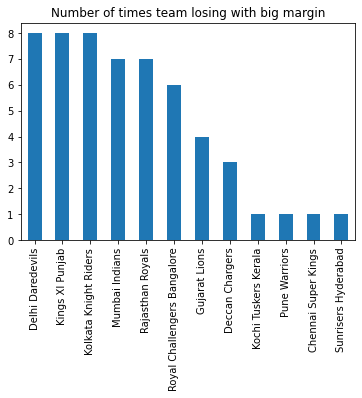

In [62]:
new_data1.losing_team.value_counts().plot(kind = 'bar', title = 'Number of times team losing with big margin')

In [63]:
#Now let's do analysis on Number of times a player got the Man of the Match till 2017 edition of IPL.

In [64]:
# number of times the playes got Man of the match
mom_players = data.player_of_match.value_counts()

<AxesSubplot:title={'center':'Number of times a player got Man of the Match'}>

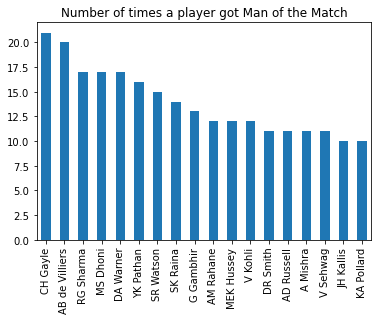

In [65]:
#want to analyse only those players who got the award atleast 10 times
mom_players[mom_players >= 10 ].plot(kind = 'bar', title = 'Number of times a player got Man of the Match')